<a href="https://colab.research.google.com/github/villeguits/Python_Exercises/blob/main/Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris

# Libreria para árboles de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Librería para Random Forest
from sklearn.ensemble import RandomForestClassifier

# Librería de división de datos
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import accuracy_score

# Estado aleatorio para que de lo mismo
np.random.seed(0)

In [ ]:
data = pd.read_csv('compras.csv')

In [ ]:
print(data.shape)
data.head(8)

(30, 4)


,vacaciones,descuento,entrega_gratuita,compra
0,no,si,si,si
1,no,si,si,si
2,no,no,no,no
3,si,si,si,si
4,si,si,si,si
5,si,no,no,no
6,si,si,no,si
7,no,si,si,si


In [ ]:
def transformar(x):
    if x == 'si':
        return 1
    return 0

for columna in data.columns:
    data[columna] = data[columna].apply(transformar)

In [ ]:
# Columnas entrenamiento
cols_entrenamiento = data.columns[:-1]

# Columna respuesta
col_y = 'compra'

In [ ]:
#X, y = data[cols_entrenamiento], data[col_y]

In [ ]:
data_entrenamiento, data_prueba = train_test_split(data)

In [ ]:
data_entrenamiento.shape, data_prueba.shape

((22, 4), (8, 4))

In [ ]:
arbol_decision = DecisionTreeClassifier()

In [ ]:
arbol_decision.fit(data[cols_entrenamiento], data[col_y])

DecisionTreeClassifier()

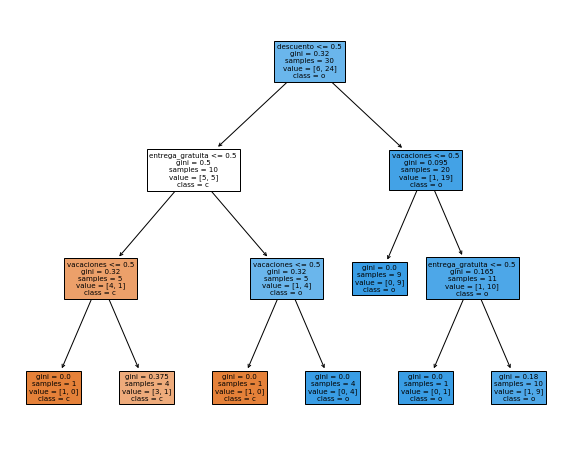

In [ ]:
plt.figure(figsize=(10, 8))
plot_tree(arbol_decision, feature_names=data.columns, class_names='compra', rounded=False, filled=True, proportion=False);

In [ ]:
for columna in data.columns:
    print(columna)
    print('SI')
    data_columna_si = data_entrenamiento[data_entrenamiento['compra'] == 1]
    print(data_columna_si[columna].value_counts())
    print('NO')
    data_columna_si = data_entrenamiento[data_entrenamiento['compra'] == 0]
    print(data_columna_si[columna].value_counts())

In [ ]:
predicciones = arbol_decision.predict(data_prueba[cols_entrenamiento])

In [ ]:
predicciones

array([0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)